In [1]:
import pandas as pd
import numpy as np

In [2]:
import mysql.connector

# Establishing a connection
conn = mysql.connector.connect(
  host="localhost",
  user="root",
  password="afafaedacaedc",
  database="afcaedc"
)




In [3]:
df_cust=pd.read_sql("select * from customers",conn)
df_cs=pd.read_sql("select * from credit_profiles",conn)
df_tr=pd.read_sql("select * from transactions",conn)
df_trac=pd.read_sql("select * from avg_transactions_after_campaign",conn)

C:\Users\91701\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\91701\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\91701\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\91701\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqli

In [4]:
df_cust=pd.read_csv("customers.csv")

## Starting with Customer table

## Checking null values

In [5]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [6]:
df_cust.isnull().sum() #50 null values

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [7]:
df_cust[df_cust['annual_income'].isna()].reset_index()

,index,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
1,82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
2,97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
3,102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
4,155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married
5,170,171,Advait Verma,Male,52,City,Business Owner,NaN,Single
6,186,187,Samar Sardar,Male,53,City,Consultant,NaN,Single
7,192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,NaN,Married
8,227,228,Advait Mukherjee,Male,48,City,Business Owner,NaN,Married
9,232,233,Aditya Goel,Male,26,City,Freelancer,NaN,Married


In [8]:
#Filling all na values with median values of that occupation

In [9]:
import pandas as pd

# Assuming df_cust is your DataFrame
# First, calculate the median income for each occupation
occupation_median_income = df_cust.groupby('occupation')['annual_income'].median()



In [10]:
def get_med_occupation(row):
    if pd.isnull(row['annual_income']):
        return occupation_median_income[row['occupation']]
    else:
        return row['annual_income']

In [11]:
df_cust['annual_income'] = df_cust.apply(lambda row: get_med_occupation(row), axis=1)

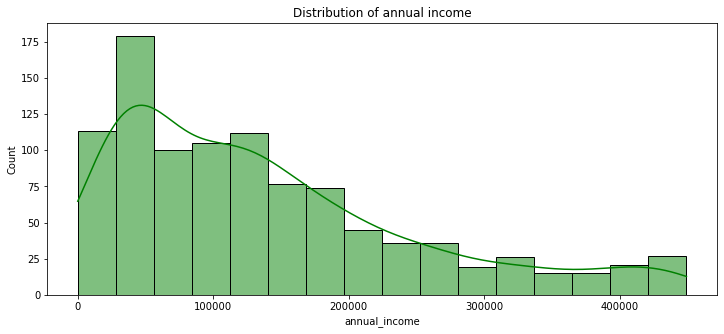

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.histplot(df_cust['annual_income'],kde=True,color='green',label='Data')
plt.title('Distribution of annual income')
plt.show()

# Handling outliers in annual income

In [13]:
#Idea is to replace annual_income less tha 100 with the median annual income of the occupation

In [14]:
def outlier(row):
    if row['annual_income']<100:
        return occupation_median_income[row['occupation']]
    else:
        return row['annual_income']

In [15]:
df_cust['annual_income']=df_cust.apply(lambda row:outlier(row),axis=1)

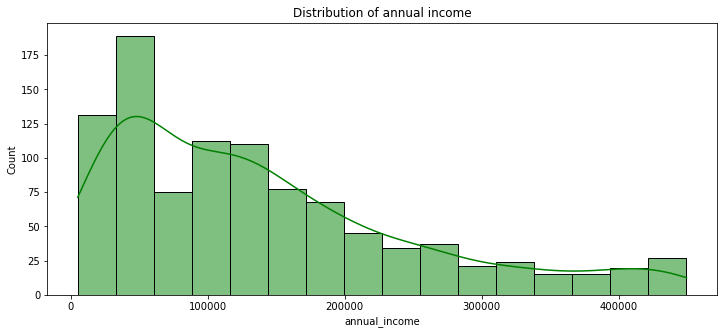

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
sns.histplot(df_cust['annual_income'],kde=True,color='green',label='Data')
plt.title('Distribution of annual income')
plt.show()

In [17]:
# Average income per occupation

[]

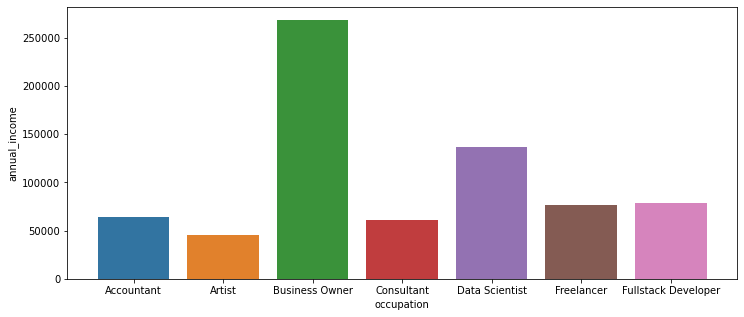

In [18]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.barplot(data=df_cust.groupby(['occupation']).agg({'annual_income': 'mean'}).reset_index(), x='occupation', y='annual_income')
plt.plot()

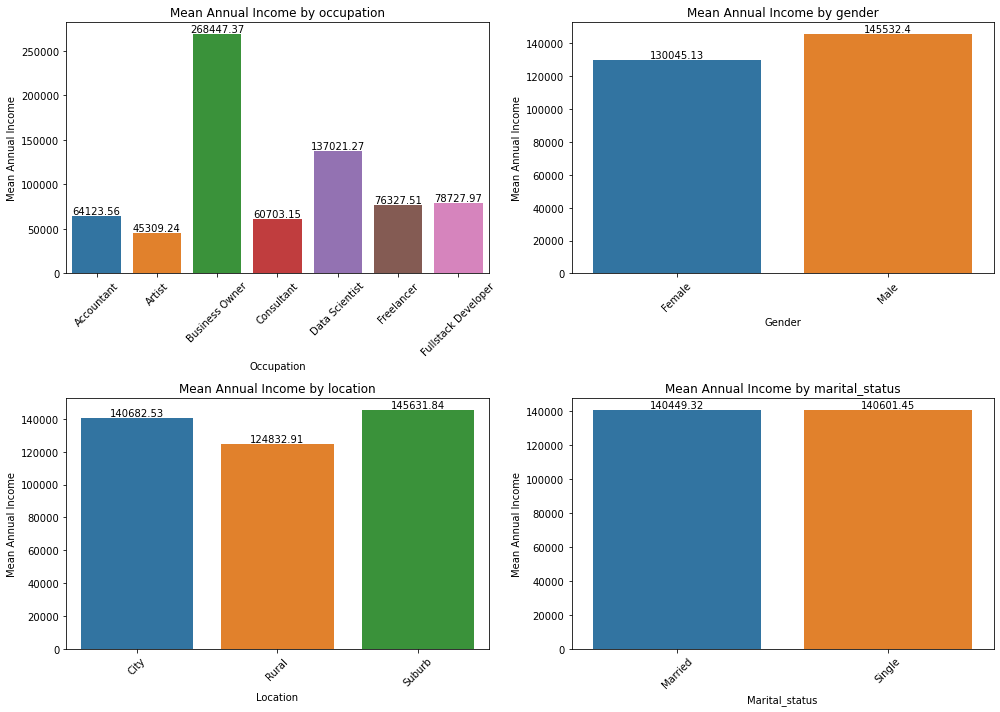

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of categorical variables
categorical_variables = ['occupation', 'gender', 'location', 'marital_status']

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical variable and create a bar plot in each subplot
for i, variable in enumerate(categorical_variables):
    sns.barplot(x=variable, y='annual_income', data=df_cust.groupby(variable).agg({'annual_income': 'mean'}).reset_index(), ax=axes[i])
    axes[i].set_title(f'Mean Annual Income by {variable}')
    axes[i].set_xlabel(variable.capitalize())
    axes[i].set_ylabel('Mean Annual Income')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability if needed

    # Add labels to the bars
    for index, row in df_cust.groupby(variable).agg({'annual_income': 'mean'}).reset_index().iterrows():
        axes[i].text(index, row['annual_income'], round(row['annual_income'], 2), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()


# Analysing age column

## Handle null values

In [20]:
df_cust.isnull().sum() ##no nulls

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

## Handling outliers

In [21]:
df_cust.describe() #definately some outliers

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


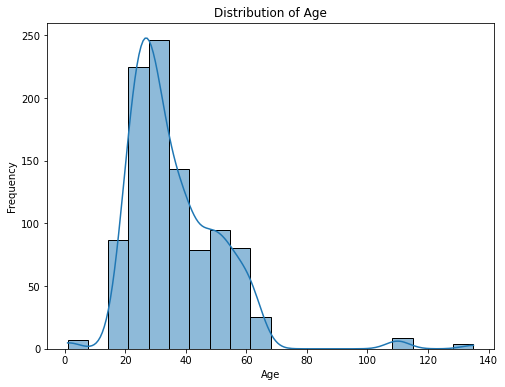

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.histplot(df_cust['age'], bins=20, kde=True)  # Adjust bin size as needed
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#definately some outliers

In [23]:
## Replacing outliers with median age of that occupation

In [24]:
occupation_median_age = df_cust.groupby('occupation')['age'].median()
def outlier_age(row):
    if row['age']<15 or row['age']>80 :
        return occupation_median_age[row['occupation']]
    else:
        return row['age']

In [25]:
df_cust['age']=df_cust.apply(lambda row:outlier_age(row),axis=1)

In [26]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married
...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married
998,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married


## EDA

### Creating categories for age`

In [27]:
import pandas as pd

# Sample DataFrame



# Define bins and labels
bins = [18, 26, 49, 66]
labels = ['18-25', '26-48', '49-65']

# Categorize age column
df_cust['age_category'] = pd.cut(df_cust['age'], bins=bins, labels=labels, right=False)




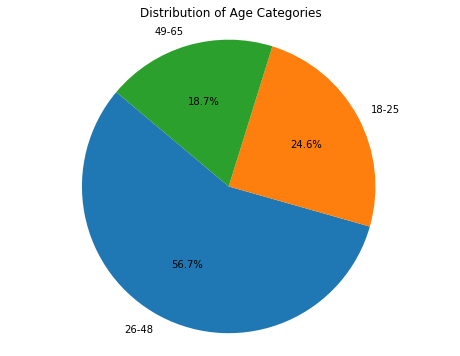

In [28]:
import matplotlib.pyplot as plt

# Assuming you have already categorized the age into age categories

# Count the occurrences of each age category
age_category_counts = df_cust['age_category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Working with locations and gender

In [29]:
df_pivot=df_cust.groupby(['location','gender']).size().unstack()

In [30]:
df_pivot

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


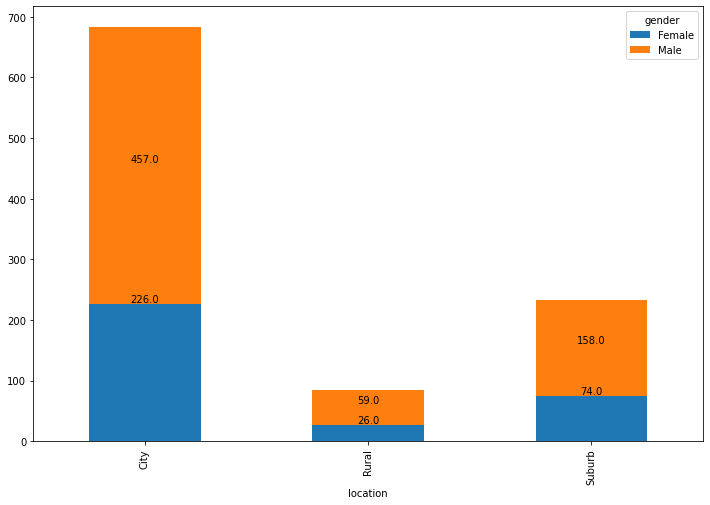

In [31]:
import matplotlib.pyplot as plt

# Assuming df_pivot is your DataFrame

# Plotting the clustered bar graph
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

# Adding data labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


## EXPLORING CREDIT SCORE TABLE

In [32]:
df_cs ##there must be duplicates since the there are only 1000 customers

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0
...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0
1000,997,774,0.465462,17139.0,0.0,60000.0
1001,998,529,0.585856,386.0,3.0,1000.0
1002,999,725,0.249670,6973.0,2.0,40000.0


In [33]:
df_cs.nunique()

cust_id                           1000
credit_score                       419
credit_utilisation                1000
outstanding_debt                   781
credit_inquiries_last_6_months       5
credit_limit                         8
dtype: int64

In [34]:
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [35]:
#drop_duplicates

In [36]:
df_cs=df_cs.drop_duplicates(subset='cust_id',keep='last')

In [37]:
#checking null value
df_cs.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [38]:
df_cs[df_cs['credit_limit'].isnull()]
#now since credit_limit depends on credit_score need to find out a method to replace the null credit_limit from credit_score

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


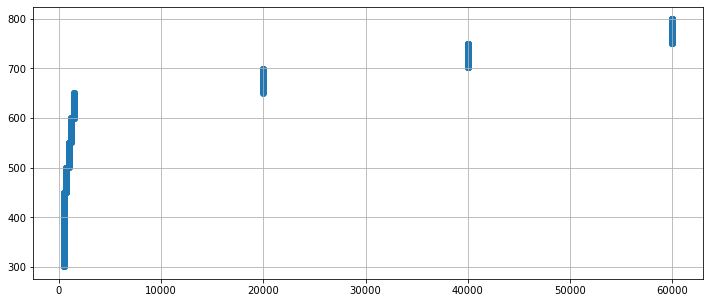

In [39]:

plt.figure(figsize=(12,5))
plt.scatter(df_cs['credit_limit'],df_cs['credit_score'])
plt.grid(True)
plt.show()


In [40]:
#Defining categories
# Define the bins and labels for the categories
bins = [300,450,500,550,600,650, 700,750,800]  # Define your own bins according to your data distribution
labels = [f"{start}-{end-1}" for start, end in zip(bins, bins[1:])]
df_cs['credit_score_category']=pd.cut(df_cs['credit_score'],bins=bins,labels=labels,include_lowest=True,right=False)



C:\Users\91701\AppData\Local\Temp\ipykernel_18472\2048704802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs['credit_score_category']=pd.cut(df_cs['credit_score'],bins=bins,labels=labels,include_lowest=True,right=False)


In [41]:
df_cs

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_category
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0,550-599
1000,997,774,0.465462,17139.0,0.0,60000.0,750-799
1001,998,529,0.585856,386.0,3.0,1000.0,500-549
1002,999,725,0.249670,6973.0,2.0,40000.0,700-749


In [42]:
#Getting the mean credit_limit for each category
import statistics

mode_credit_limit = df_cs.groupby(["credit_score_category"])["credit_limit"].agg(lambda x: statistics.mode(x)).reset_index()


In [43]:
mode_credit_limit

,credit_score_category,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [44]:
df_cs.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
credit_score_category              0
dtype: int64

In [45]:
import pandas as pd
import statistics

# Define a function to fill missing credit limits with mode
def fill_missing_credit_limit(row):
    if pd.isnull(row['credit_limit']):
        mode = mode_credit_limit[mode_credit_limit['credit_score_category'] == row['credit_score_category']]['credit_limit'].values
        if len(mode) > 0:
            return mode[0]
    return row['credit_limit']

# Apply the function to fill missing credit limits
df_cs['credit_limit'] = df_cs.apply(fill_missing_credit_limit, axis=1)


C:\Users\91701\AppData\Local\Temp\ipykernel_18472\3553923548.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs['credit_limit'] = df_cs.apply(fill_missing_credit_limit, axis=1)


In [46]:
df_cs

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_category
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0,550-599
1000,997,774,0.465462,17139.0,0.0,60000.0,750-799
1001,998,529,0.585856,386.0,3.0,1000.0,500-549
1002,999,725,0.249670,6973.0,2.0,40000.0,700-749


In [47]:
df_cs.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000


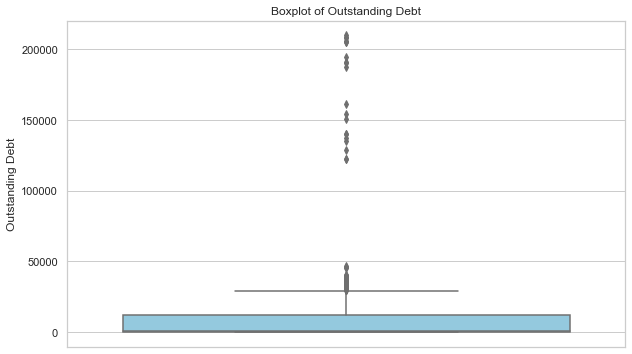

In [48]:
plt.figure(figsize=[10,6])
sns.set(style="whitegrid")
sns.boxplot(y=df_cs['outstanding_debt'], color='skyblue', fliersize=5)
plt.title('Boxplot of Outstanding Debt')
plt.ylabel('Outstanding Debt')
plt.show()

In [49]:
#Since debt cannot be higher than credit limit

In [50]:
df_cs[df_cs['outstanding_debt']>df_cs['credit_limit']]
#replacing outstanding_debt with credit_limit in these cases

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_category
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
19,20,647,0.439132,205014.0,3.0,1500.0,600-649
25,26,758,0.250811,190838.0,2.0,60000.0,750-799
38,39,734,0.573023,122758.0,3.0,40000.0,700-749
93,94,737,0.739948,137058.0,2.0,40000.0,700-749
204,205,303,0.364360,187849.0,0.0,500.0,300-449
271,272,703,0.446886,154568.0,1.0,40000.0,700-749
301,302,722,0.608076,122402.0,4.0,40000.0,700-749
330,331,799,0.363420,208898.0,4.0,60000.0,750-799
350,351,320,0.285081,150860.0,0.0,500.0,300-449


In [51]:
df_cs.loc[df_cs['outstanding_debt']>df_cs['credit_limit'],'outstanding_debt']=df_cs['credit_limit']

In [52]:
df_cs[df_cs['outstanding_debt']>df_cs['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_category


## Correlation analysis

In [53]:
df_merge=df_cust.merge(df_cs,on='cust_id',how='inner')

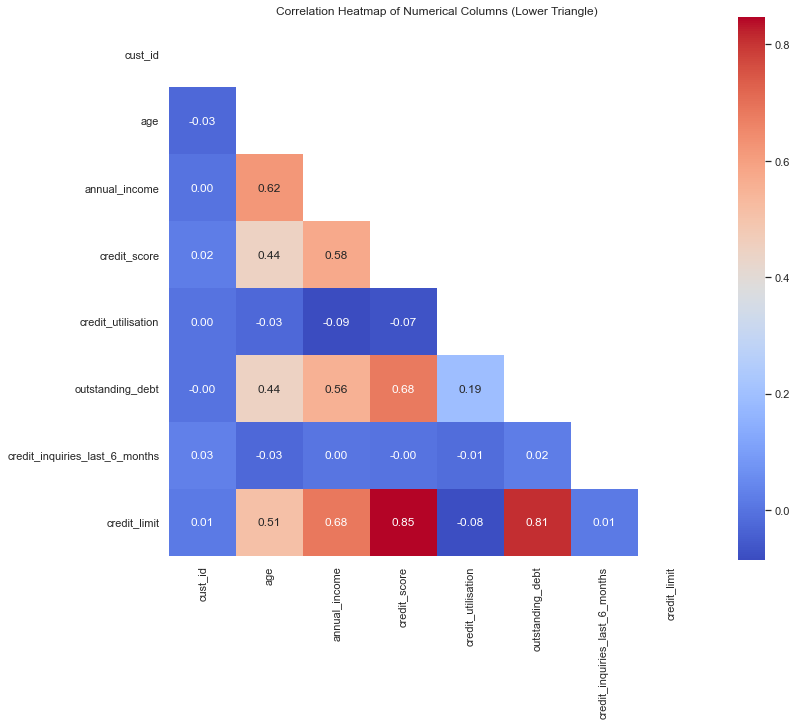

In [54]:
import numpy as np
numerical_columns = df_merge.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the masked upper triangle
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, square=True)

# Set plot title
plt.title('Correlation Heatmap of Numerical Columns (Lower Triangle)')

# Show plot
plt.show()


In [55]:
df_trac

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,251.02,401.78
1,2023-09-11,250.77,326.16
2,2023-09-12,248.81,303.92
3,2023-09-13,255.90,363.29
4,2023-09-14,255.86,317.06
...,...,...,...
57,2023-11-06,245.42,395.99
58,2023-11-07,246.32,432.28
59,2023-11-08,223.10,351.79
60,2023-11-09,253.67,325.00


## Transactions table

In [56]:
df_tr.head(10)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
5,6,527,2023-01-01,38,Shopify,Fashion & Apparel,Debit Card
6,7,388,2023-01-01,720,Alibaba,Electronics,Credit Card
7,8,8,2023-01-01,140,Shopify,Kitchen Appliances,Gpay
8,9,939,2023-01-01,144,Alibaba,Beauty & Personal Care,Phonepe
9,10,228,2023-01-01,836,Ebay,Electronics,Gpay


In [57]:
df_tr.isnull().sum() #need to replace null values in platform

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [58]:
df_tr.platform.unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', None], dtype=object)

In [59]:
df_tr[df_tr['platform'].isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,None,Electronics,Net Banking
418,419,383,2023-01-01,338,None,Electronics,Credit Card
607,608,421,2023-01-01,700,None,Electronics,Phonepe
844,845,945,2023-01-01,493,None,Sports,Credit Card
912,913,384,2023-01-01,85,None,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,None,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,None,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,None,Sports,Net Banking
499833,499834,616,2023-09-05,97,None,Fashion & Apparel,Credit Card


In [60]:
## Trying to find out the mod of platform for various payment_type and product_category

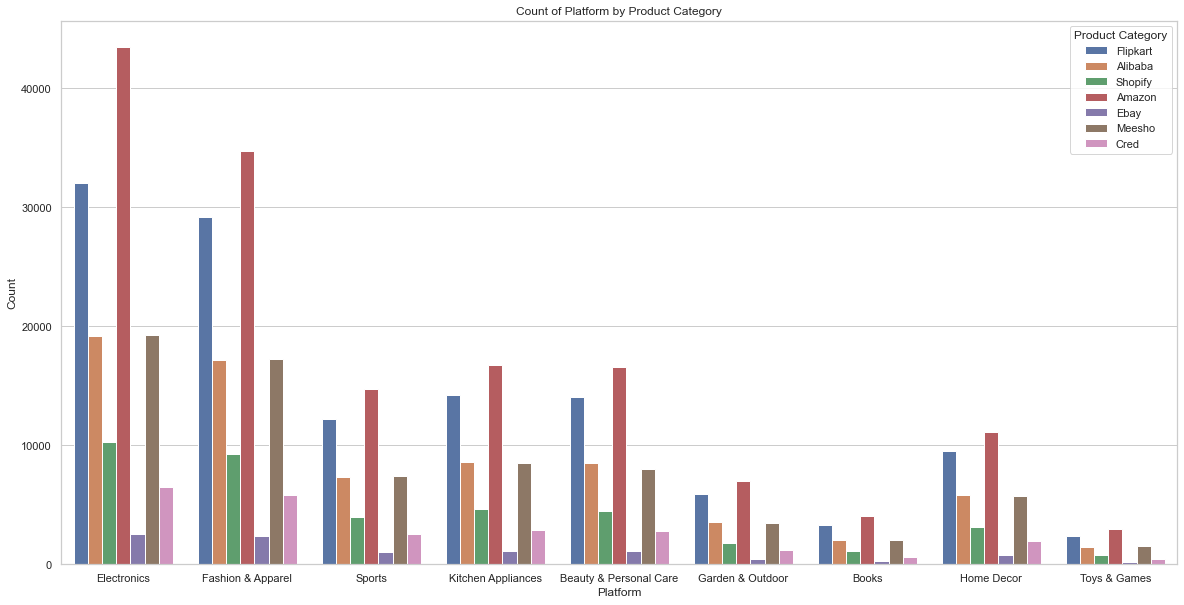

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot column chart
plt.figure(figsize=(20, 10))
sns.countplot(data=df_tr, x='product_category', hue='platform')
plt.title('Count of Platform by Product Category')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Product Category')
plt.show()


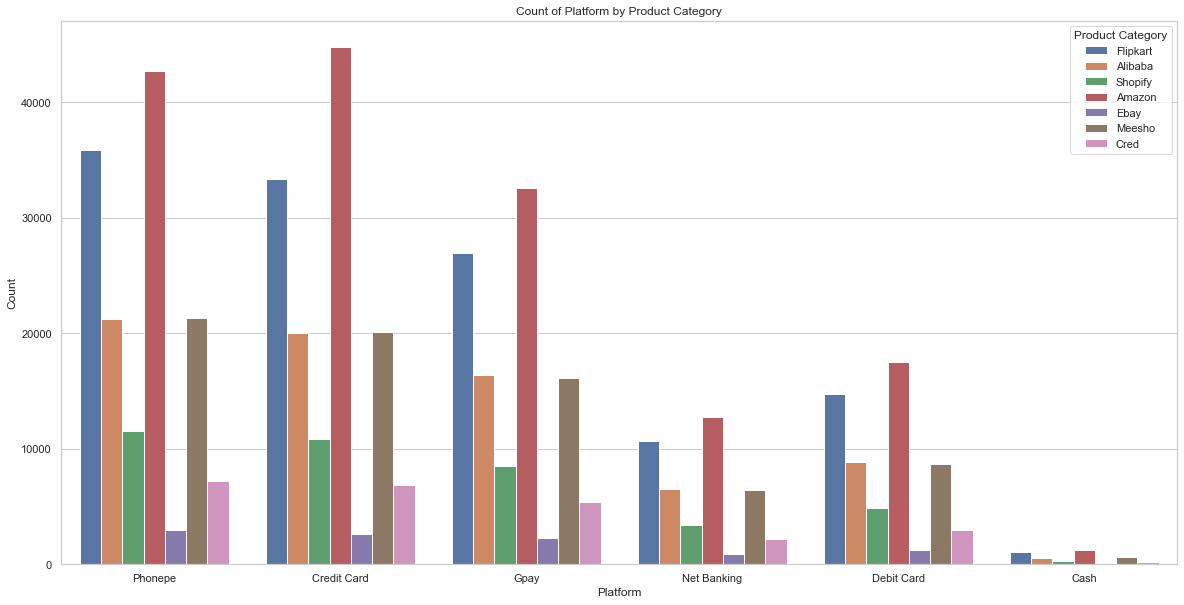

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot column chart
plt.figure(figsize=(20, 10))
sns.countplot(data=df_tr, x='payment_type', hue='platform')
plt.title('Count of Platform by Product Category')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Product Category')
plt.show()


In [63]:
#Since Amazon is mode for both of these categories, replacing all null with Amazon

In [64]:
df_tr['platform']=df_tr['platform'].fillna("Amazon")

In [65]:
df_tr.describe() #tran_amount cannot be zero

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [66]:
df_tr_zero=df_tr[df_tr['tran_amount']==0]

In [67]:
df_tr_zero[['platform','payment_type','product_category']].value_counts()

platform  payment_type  product_category
Amazon    Credit Card   Electronics         4734
dtype: int64

In [68]:
df_tr1=df_tr[(df_tr['platform']=='Amazon') & (df_tr['payment_type']=='Credit Card') & (df_tr['product_category']=='Electronics')]

In [69]:
df_tr1[df_tr1['tran_amount']>0]['tran_amount'].median()

554.0

# replacing this median with the 0 values

In [70]:
df_tr.loc[df_tr['tran_amount']==0,'tran_amount']=554

In [71]:
import pandas as pd

# Assuming df_tr is your DataFrame and 'tran_amount' is the column of interest
Q1 = df_tr['tran_amount'].quantile(0.25)
Q3 = df_tr['tran_amount'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_tr[(df_tr['tran_amount'] < lower_bound) | (df_tr['tran_amount'] > upper_bound)]




In [72]:
upper_bound

933.5

In [73]:
outliers 

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
19,20,70,2023-01-01,945,Meesho,Electronics,Phonepe
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
48,49,532,2023-01-01,974,Flipkart,Electronics,Debit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499921,499922,492,2023-09-05,940,Amazon,Electronics,Gpay
499930,499931,365,2023-09-05,983,Alibaba,Electronics,Net Banking
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay
499993,499994,820,2023-09-05,950,Meesho,Electronics,Gpay


In [74]:
## Calculating mean tran_amount for each product_category
pr=df_tr[(df_tr['tran_amount'] >= lower_bound) | (df_tr['tran_amount'] <= upper_bound)].groupby('product_category')['tran_amount'].mean()

In [75]:
pr

product_category
Beauty & Personal Care    3130.401409
Books                     3014.313165
Electronics               3485.140358
Fashion & Apparel         3035.716148
Garden & Outdoor          3188.962824
Home Decor                3257.045835
Kitchen Appliances        3162.309051
Sports                    3283.156708
Toys & Games              3057.770602
Name: tran_amount, dtype: float64

In [76]:
df_tr.loc[outliers.index,'tran_amount']=df_tr['product_category'].map(pr)

In [77]:
df_tr.loc[outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
19,20,70,2023-01-01,3485.140358,Meesho,Electronics,Phonepe
26,27,380,2023-01-01,3130.401409,Shopify,Beauty & Personal Care,Credit Card
48,49,532,2023-01-01,3485.140358,Flipkart,Electronics,Debit Card
49,50,287,2023-01-01,3057.770602,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,3162.309051,Ebay,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499921,499922,492,2023-09-05,3485.140358,Amazon,Electronics,Gpay
499930,499931,365,2023-09-05,3485.140358,Alibaba,Electronics,Net Banking
499966,499967,662,2023-09-05,3283.156708,Meesho,Sports,Gpay
499993,499994,820,2023-09-05,3485.140358,Meesho,Electronics,Gpay


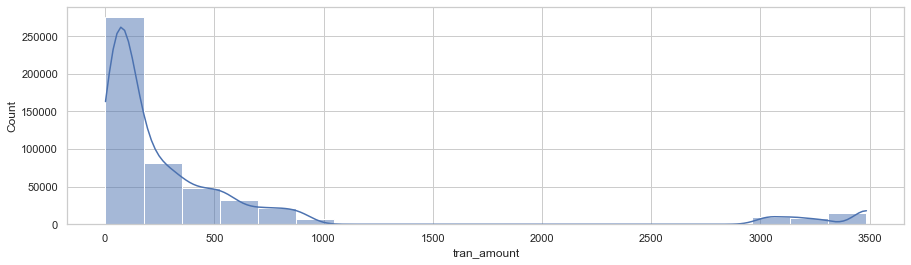

In [78]:
plt.figure(figsize=(15,4))
sns.histplot(df_tr['tran_amount'],kde=True,bins=20)
plt.show()

## Distributions according to age

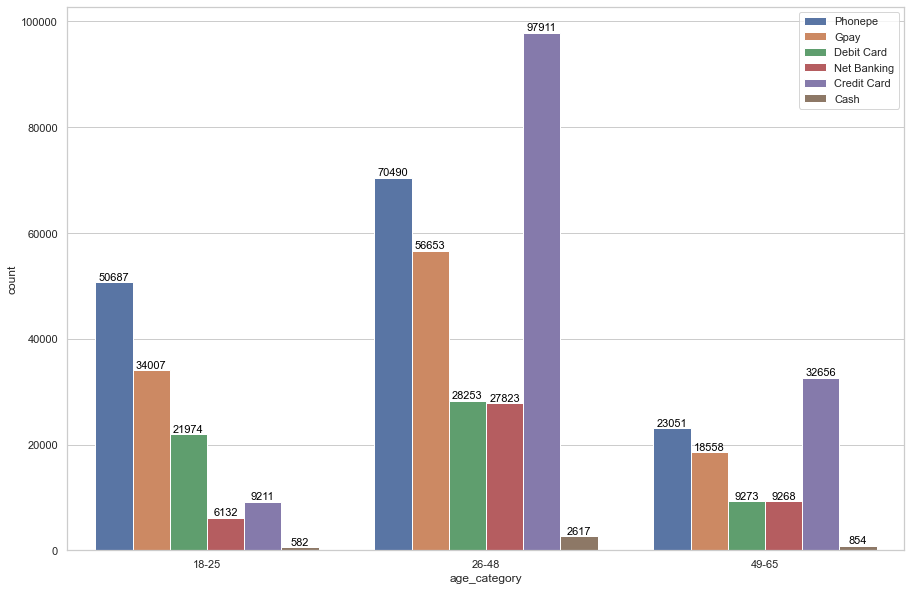

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming df_tr and df_cust are defined somewhere in your code

# Merge df_tr and df_cust on 'cust_id'
df_merged2 = pd.merge(df_tr, df_cust, on='cust_id')
plt.figure(figsize=(15,10))
# Create count plot
ax = sns.countplot(x=df_merged2['age_category'], hue=df_merged2['payment_type'])

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add legend with desired location
plt.legend(loc='upper right')

plt.show()


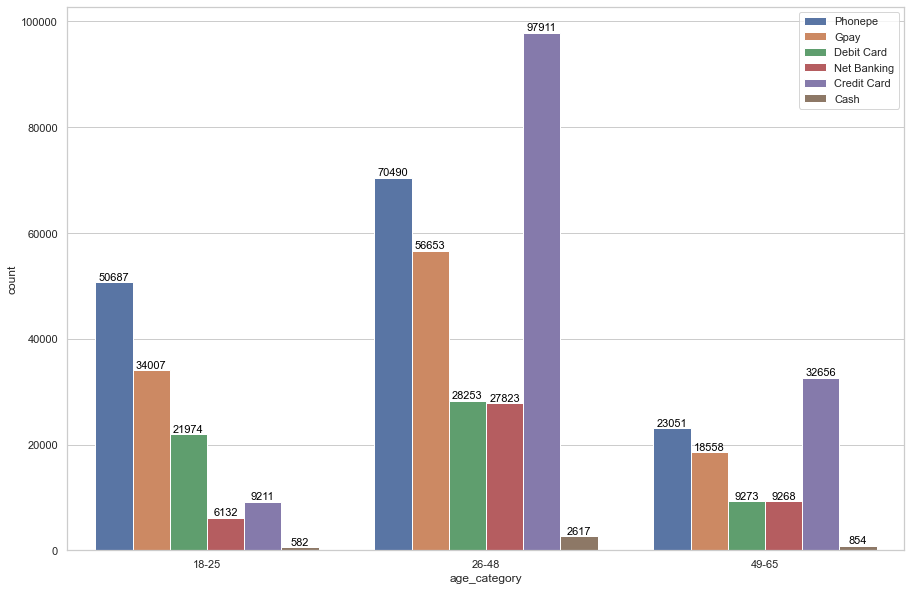

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming df_tr and df_cust are defined somewhere in your code

# Merge df_tr and df_cust on 'cust_id'
df_merged2 = pd.merge(df_tr, df_cust, on='cust_id')
plt.figure(figsize=(15,10))
# Create count plot
ax = sns.countplot(x=df_merged2['age_category'], hue=df_merged2['payment_type'])

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add legend with desired location
plt.legend(loc='upper right')

plt.show()


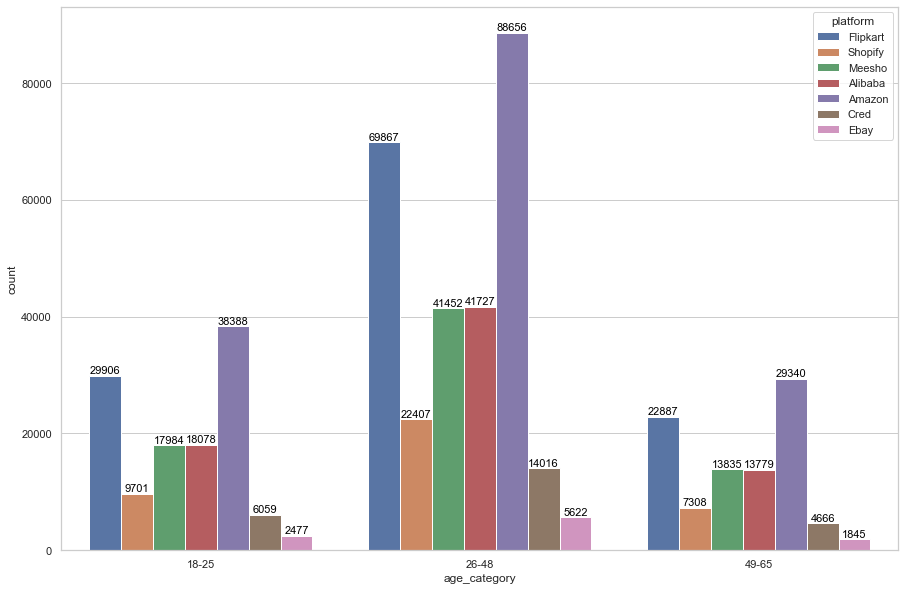

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Merge df_tr and df_cust on 'cust_id'
df_merged2 = pd.merge(df_tr, df_cust, on='cust_id')
plt.figure(figsize=(15,10))
# Create count plot
ax = sns.countplot(x=df_merged2['age_category'], hue=df_merged2['platform'])

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


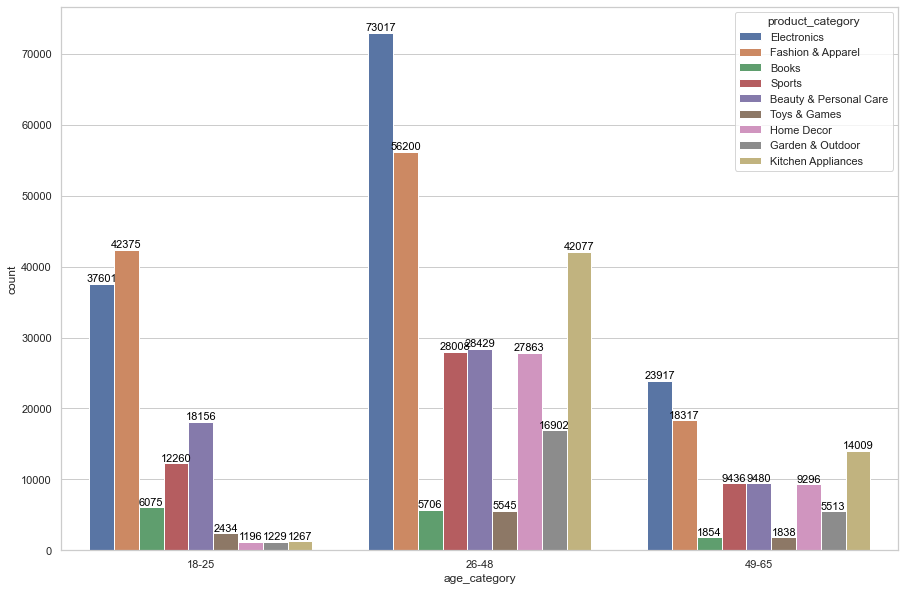

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Merge df_tr and df_cust on 'cust_id'
df_merged2 = pd.merge(df_tr, df_cust, on='cust_id')
plt.figure(figsize=(15,10))
# Create count plot
ax = sns.countplot(x=df_merged2['age_category'], hue=df_merged2['product_category'])

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


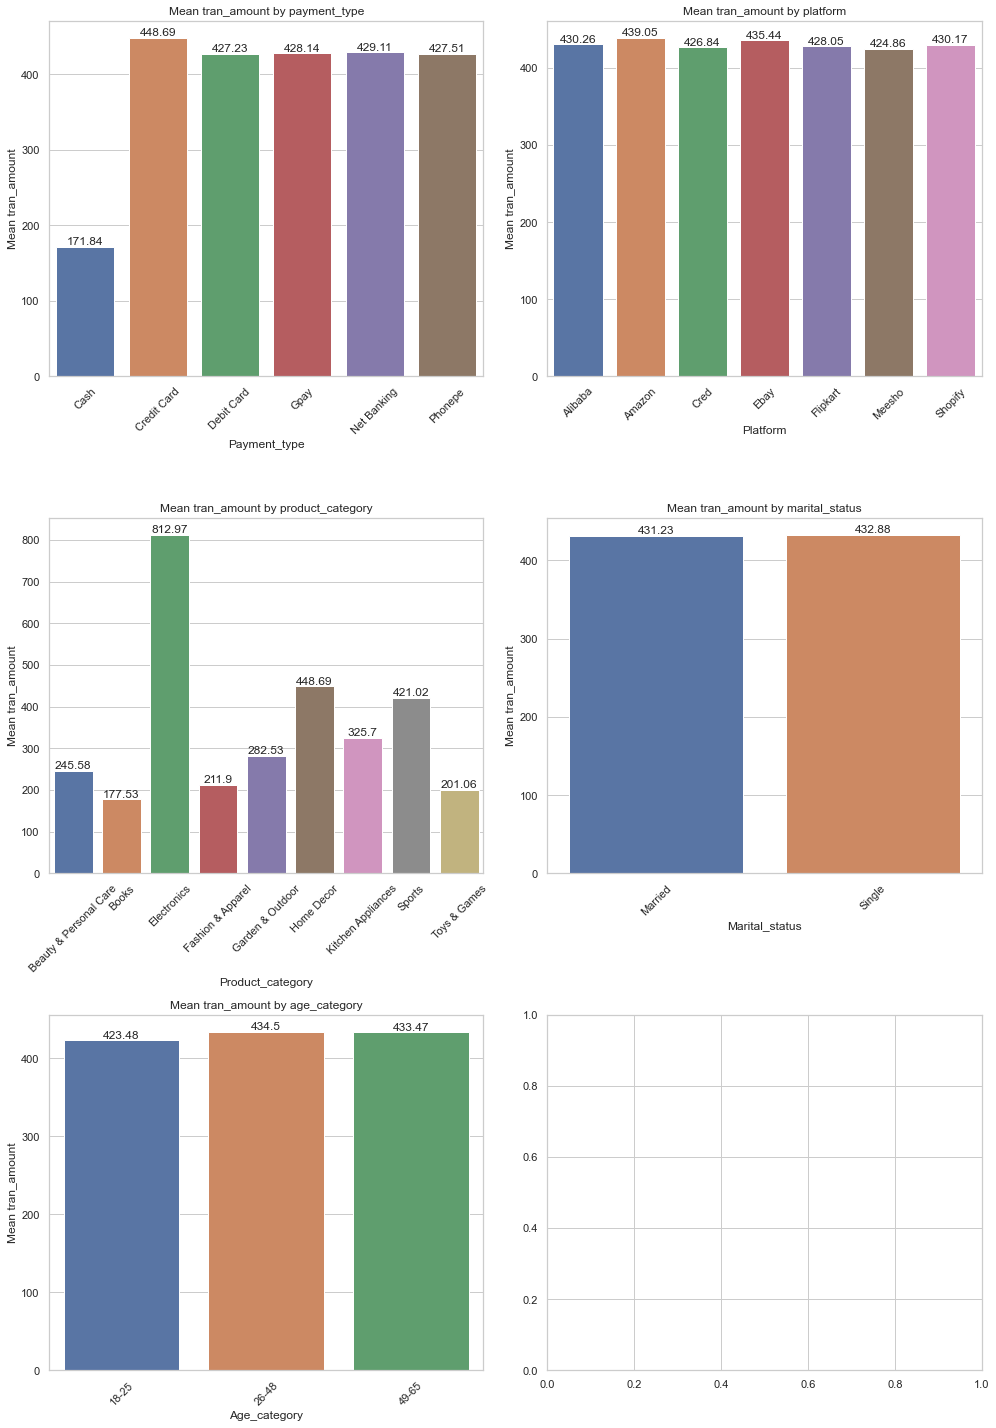

In [83]:
## Figuring average transaction amount
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of categorical variables
categorical_variables = ['payment_type', 'platform', 'product_category', 'marital_status','age_category']

# Define the number of rows and columns for subplots
num_rows = 3
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical variable and create a bar plot in each subplot
for i, variable in enumerate(categorical_variables):
    sns.barplot(x=variable, y='tran_amount', data=df_merged2.groupby(variable).agg({'tran_amount': 'mean'}).reset_index(), ax=axes[i])
    axes[i].set_title(f'Mean tran_amount by {variable}')
    axes[i].set_xlabel(variable.capitalize())
    axes[i].set_ylabel('Mean tran_amount')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability if needed

    # Add labels to the bars
    for index, row in df_merged2.groupby(variable).agg({'tran_amount': 'mean'}).reset_index().iterrows():
        axes[i].text(index, row['tran_amount'], round(row['tran_amount'], 2), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()


## average income,credit limit,credit score according to age_category

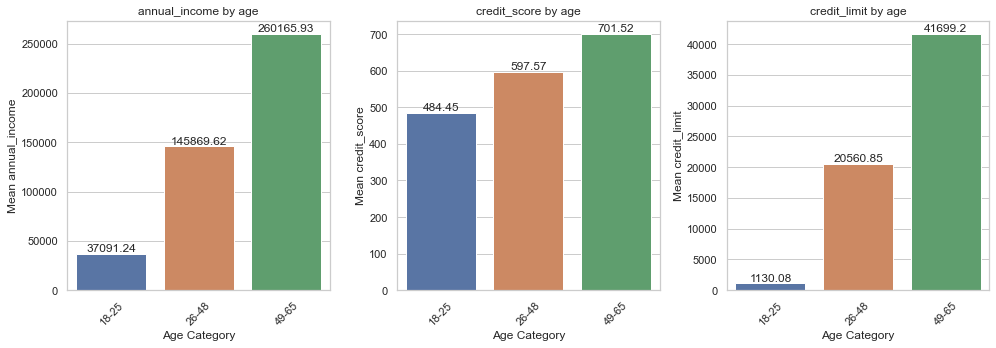

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_cs and df_cust are already defined dataframes

df_merged3 = pd.merge(df_cs, df_cust, on='cust_id')

# Define a list of categorical variables
average_col = ['annual_income', 'credit_score', 'credit_limit']

# Define the number of rows and columns for subplots
num_rows = 1
num_cols = len(average_col)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 5))

# If there's only one column, ensure axes is a list
if num_cols == 1:
    axes = [axes]

# Loop through each categorical variable and create a bar plot in each subplot
for i, variable in enumerate(average_col):
    sns.barplot(x='age_category', y=variable, data=df_merged3.groupby('age_category').agg({variable: 'mean'}).reset_index(), ax=axes[i])
    axes[i].set_title(f'{variable} by age')
    axes[i].set_xlabel('Age Category')
    axes[i].set_ylabel(f'Mean {variable}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability if needed

    # Add labels to the bars
    for index, row in df_merged3.groupby('age_category').agg({variable: 'mean'}).reset_index().iterrows():
        axes[i].text(index, row[variable], round(row[variable], 2), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()


In [86]:
df_merged3

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_category,name,gender,age,location,occupation,annual_income,marital_status,age_category
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,544,0.854807,513.0,4.0,1000.0,500-549,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,504,0.336938,224.0,2.0,1000.0,500-549,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,564,0.702963,688.0,2.0,1250.0,550-599,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,26-48
996,997,774,0.465462,17139.0,0.0,60000.0,750-799,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,49-65
997,998,529,0.585856,386.0,3.0,1000.0,500-549,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,26-48
998,999,725,0.249670,6973.0,2.0,40000.0,700-749,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,26-48


# Phase 2 A/B testing

## Determing campaign size

In [87]:
import numpy as np
import statsmodels.stats.power as smp

# Define power and significance level
power = 0.8
alpha = 0.05

# Define effect sizes to test
effect_sizes = [0.1, 0.2, 0.3, 0.4]

# Calculate sample size for each effect size
for effect_size in effect_sizes:
    sample_size = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')
    print(f"Effect Size: {effect_size}, Sample Size: {np.ceil(sample_size)}")


Effect Size: 0.1, Sample Size: 1571.0
Effect Size: 0.2, Sample Size: 394.0
Effect Size: 0.3, Sample Size: 176.0
Effect Size: 0.4, Sample Size: 100.0


### Now performing Z test on average transactions after campaign

In [88]:
df_trac

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,251.02,401.78
1,2023-09-11,250.77,326.16
2,2023-09-12,248.81,303.92
3,2023-09-13,255.90,363.29
4,2023-09-14,255.86,317.06
...,...,...,...
57,2023-11-06,245.42,395.99
58,2023-11-07,246.32,432.28
59,2023-11-08,223.10,351.79
60,2023-11-09,253.67,325.00


## Null hypothesis: test_group_avg_tran is not significantly more than control_group_avg_tran
## Alternate hypothesis: test_group_avg_tran is significantly more than control_group_avg_tran

In [89]:
import pandas as pd
from scipy import stats

# Calculate the mean and standard deviation of both groups
control_mean = df_trac['control_group_avg_tran'].mean()
test_mean = df_trac['test_group_avg_tran'].mean()
control_std = df_trac['control_group_avg_tran'].std()
test_std = df_trac['test_group_avg_tran'].std()

# Number of samples
n = len(df_trac)

# Calculate Z-score
Z = (test_mean - control_mean) / (test_std / (n**0.5))

# Calculate p-value
p_value = 1 - stats.norm.cdf(Z)

# Define significance level (e.g., 0.05)
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the groups.")

print("Z-score:", Z)
print("p-value:", p_value)

Reject null hypothesis: There is a significant difference between the groups.
Z-score: 15.136417771692296
p-value: 0.0


## As we can see the p value is 0.0 which is lower than 0.05 so we can say that the new card is working